### Часть I: О теореме Байеса

#### Задание 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!  
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.  


***
Прокурор хотел оценить вероятность иметь данную группу крови при условии невиновности подсудимого, но сделал это неверно. А также получил неверный вывод о том, что веротяность виновности подсудимого равна 99%.  
Нужно было оценить вероятность виновности при условии наличия данной группы крови.
$$
P(guilt\;|\;rare \; blood \; group) = \frac{P(guilt)P(rare \; blood \; group\;|\;guilt)}{P(rare \; blood \; group)}
$$

#### Задание 2

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


***
Адвокат оценил вероятность быть виновным для случайнного человека с данной группой крови. Она действительно равна 0.01%.  
Однако неверно исключать факт о наличии данной группы крови из материалов дела.  
Адвокат, как и прокурор, должен был оценить вероятность виновности при условии налачия данной редкой группы крови.  

#### Задание 3

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.  
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).  
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def desease_if_positive_test(p_disease, p_false_positive, p_false_negative):
    return (((1 - p_false_negative) * p_disease) / 
            ((p_disease * (1 - p_false_negative)) + (1 - p_disease) * p_false_positive))

In [3]:
def desease_if_negative_test(p_disease, p_false_positive, p_false_negative):
    return ((p_false_negative * p_disease) / 
            ((p_disease * p_false_negative) + ((1 - p_disease) * (1 - p_false_positive))))

In [4]:
p_disease = 0.01
const_probability = 0.05
range_probability = np.arange(0, 0.05, 0.001)

Построим график зависимости апостериорной вероятности болезни при положительном тесте от вероятности false positive и false negative ошибок.

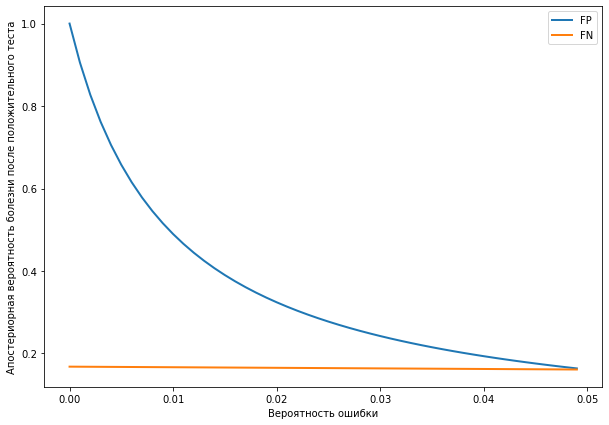

In [5]:
positive_test_from_fp = desease_if_positive_test(p_disease, range_probability, const_probability)
positive_test_from_fn = desease_if_positive_test(p_disease, const_probability, range_probability)

ig, ax = plt.subplots(figsize=(10,7))
ax.plot(range_probability, positive_test_from_fp, label="FP",  linewidth=2)
ax.plot(range_probability, positive_test_from_fn, label="FN", linewidth=2)
plt.ylabel("Апостериорная вероятность болезни после положительного теста")
plt.xlabel("Вероятность ошибки")
plt.legend()
plt.show()

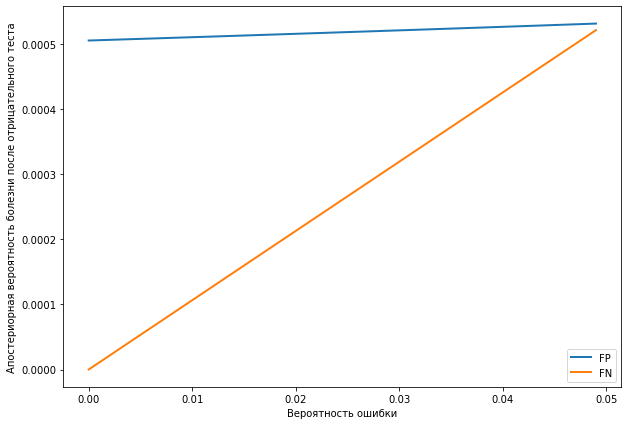

In [6]:
negative_test_from_fp = desease_if_negative_test(p_disease, range_probability, const_probability)
negative_test_from_fn = desease_if_negative_test(p_disease, const_probability, range_probability)

ig, ax = plt.subplots(figsize=(10,7))
ax.plot(range_probability, negative_test_from_fp, label="FP",  linewidth=2)
ax.plot(range_probability, negative_test_from_fn, label="FN", linewidth=2)
plt.ylabel("Апостериорная вероятность болезни после отрицательного теста")
plt.xlabel("Вероятность ошибки")
plt.legend()
plt.show()

На первый взгляд кажется, что имеет смысл уменьшать вероятность false negative ошибок, т.к. такие ошибки несут в себе опасность не оказать своевременную помощь больному человеку. Но если внимательно посмотреть на графики и попробовать оценить практический  эффект от снижения вероятностей обоих видов ошибок, то становится понятно, что выгоднее уменьшать вероятность false positive ошибок, т.к. эффект окажется более значимым. Таким образом, жертвуя относительно незначительным количеством больных людей, для которых тест не покажет наличие болезни, мы выигрываем большое количество времени и сил, которые врачи потратили бы на уточнение диагноза тех пациантов, которым тест неверно диагностировал болезнь.

### Часть II: О линейной регрессии

#### Задание 1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
import seaborn as sns

In [9]:
df = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])

In [10]:
start_date = pd.to_datetime("2020-03-03")
df_ru = df[(df["location"] == "Russia") & (df["date"] >= start_date)]
df_ru["new_cases"] = df_ru["new_cases"].apply(lambda x: 1.0 if x == 0.0 else x)
df_ru["day_number"] = np.arange(1, df_ru.shape[0] + 1)

In [11]:
train_size = 50
train = df_ru[:train_size]
test =  df_ru[train_size:]

#### Задание 2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

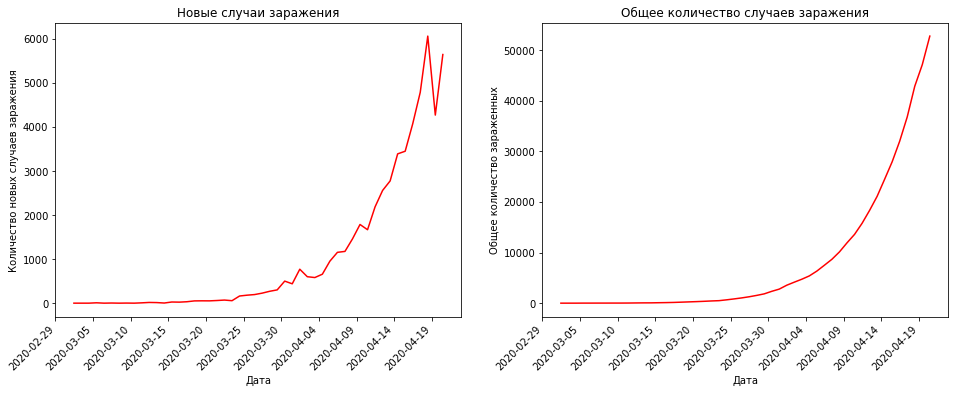

In [12]:
fig, axis = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
fig.autofmt_xdate(rotation=45)

axis[0].plot(train["date"], train["new_cases"], color="red")
axis[0].set_xlabel("Дата")
axis[0].set_ylabel("Количество новых случаев заражения")
axis[0].set_title("Новые случаи заражения")
start, end = axis[0].get_xlim()
axis[0].xaxis.set_ticks(np.arange(start, end, 5))


axis[1].plot(train["date"], train["total_cases"], color="red")
axis[1].set_xlabel("Дата")
axis[1].set_ylabel("Общее количество зараженных")
axis[1].set_title("Общее количество случаев заражения")
start, end = axis[1].get_xlim()
axis[1].xaxis.set_ticks(np.arange(start, end, 5))

plt.show()

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [13]:
test_size = 20
x_train, y_train = train["day_number"].values.reshape(-1, 1), np.log(train["total_cases"])
x_test, y_test = test["day_number"][:test_size].values.reshape(-1, 1), test["total_cases"][:test_size]
model = LinearRegression()
model.fit(x_train, y_train)
preds = np.exp(model.predict(x_test))

In [14]:
def plot_pedictions(preds, target, title):
    ig, ax = plt.subplots(figsize=(10,7))
    ax.plot(train["day_number"], train[target], label="Real values", color="black",  linewidth=2)
    ax.plot(test["day_number"][:test_size], test[target][:test_size], color="black",  linewidth=2)
    ax.plot(test["day_number"][:test_size], preds, label="Preds", linestyle='--', color="red", linewidth=2)
    plt.xlabel("Номер дня")
    plt.ylabel(title)
    plt.title(title)
    plt.legend()
    plt.show()

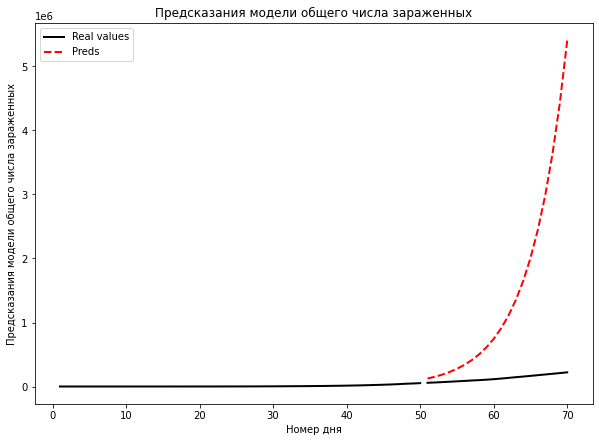

In [15]:
plot_pedictions(preds, "total_cases", "Предсказания модели общего числа зараженных")

<b>Из графика видно, что экспонента растет гораздо быстрее, чем реальное количество зараженных</b>

b.Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [16]:
def get_noise_var(real_values, train_preds):
    return (real_values - train_preds).var()

In [17]:
noise_var = get_noise_var(np.log(train["total_cases"]), model.predict(x_train))

In [18]:
mu0, sigma0 = np.array([0, 0]), 100 * np.array([[1, 0], [0, 1]])
X = np.hstack((np.ones((len(x_train), 1)), x_train))

In [19]:
def bayesian_update(mu0, sigma0, x, y, noise_var):
    sigma = np.linalg.inv(np.linalg.inv(sigma0) + (1 / noise_var) * np.transpose(x) @ x)
    mu = np.matmul(sigma, np.matmul(np.linalg.inv(sigma0), np.transpose(mu0)) + (1 / noise_var) * np.matmul(np.transpose(x), y))
    return mu, sigma

In [20]:
mu, sigma = bayesian_update(mu0, sigma0, X, y_train, noise_var)

In [21]:
def plot_posterior(X, Y, mu, sigma):
    Т = 1000
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    Z = multivariate_normal.pdf(pos, mean=mu, cov=sigma)
    plt.figure(figsize=(10, 7))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.title('Апостериорное распределение параметров модели')
    plt.xlabel('Смещение')
    plt.ylabel('Наклон')
    plt.show()

In [22]:
N = 250
X = np.linspace(1.1, 2.2, N)
Y = np.linspace(0.17, 0.23, N)
X, Y = np.meshgrid(X, Y)

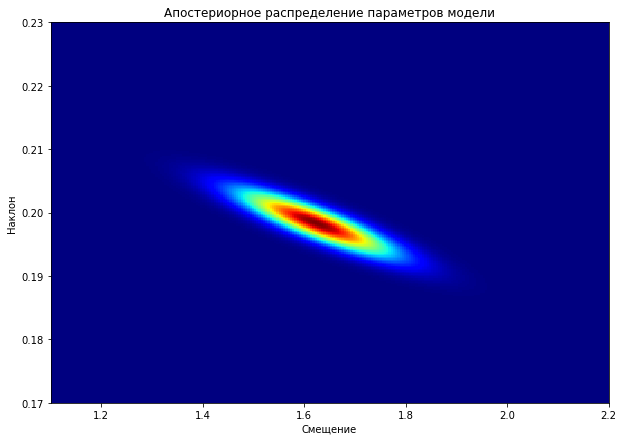

In [23]:
plot_posterior(X, Y, mu, sigma)

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [24]:
def generate_weights(mu, sigma, n_samples=100):
    return np.random.multivariate_normal(mu, sigma, n_samples)

In [25]:
weights = generate_weights(mu, sigma)

In [26]:
def plot_samples(weights, target, title, func, n_samples=100):
    xs = np.linspace(0, train_size + test_size, N)
    plt.figure(figsize=(10, 7))
    for w in weights:
        plt.plot(xs, np.exp(func(w, xs)), 'k-', lw=.3)
    plt.plot(train["day_number"], train[target], label="Train values",  linewidth=2)
    plt.plot(test["day_number"][:test_size], test[target][:test_size], label="Test values",  linewidth=3)
    plt.xlabel("Номер дня")
    plt.ylabel(title)
    plt.title(title)
    plt.show()

In [27]:
def linear(weights, x):
    return weights[0] + weights[1] * x

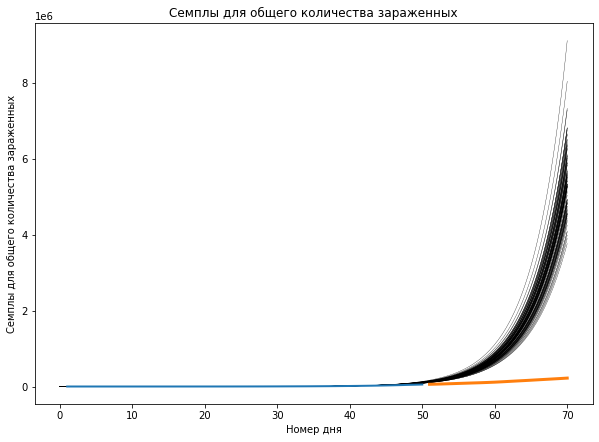

In [28]:
plot_samples(weights, "total_cases", "Семплы для общего количества зараженных", linear)

In [29]:
def get_prediction(date, model=model, start_date=start_date):
    return int(np.exp(model.predict(np.array((pd.to_datetime(date) - start_date).days + 1).reshape(-1, 1))))

In [30]:
print("Количество случаев коронавируса в России к 1 мая 2020 года - ", get_prediction("2020-05-01"))
print("Количество случаев коронавируса в России к 1 июня 2020 года - ", get_prediction("2020-06-01"))
print("Количество случаев коронавируса в России к 1 сентября 2020 года - ", get_prediction("2020-09-01"))

Количество случаев коронавируса в России к 1 мая 2020 года -  744077
Количество случаев коронавируса в России к 1 июня 2020 года -  347723874
Количество случаев коронавируса в России к 1 сентября 2020 года -  29104907396229896


In [31]:
def get_predict_samples(x, n_samples, weights):
    x_with_bias = np.hstack((np.ones((len(x), 1)), x))
    results = []
    for w in weights:
        results.append(np.exp(np.matmul(x_with_bias, w)))
    return results

In [32]:
def plot_predictive_dist(x, n_samples, weights):
    preds = get_predict_samples(x, n_samples, weights)
    plt.figure(figsize=(10, 7))
    sns.distplot(np.array(preds).mean(axis=1)).set_title("Предсказательное распределение")
    

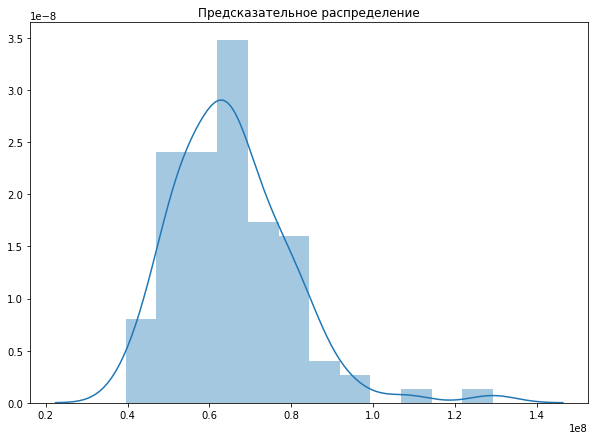

In [33]:
start = test_size + train_size
x = np.arange(start, start + 20, 1).reshape(-1, 1)
plot_predictive_dist(x, 1000, weights)

#### Задание 3

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:


Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.


a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

<b> Будем моделировать переменную new_cases плотностью нормального распределения, т.е. экспоненты от квадратичной функции. Как и в предыдущем задании перейдем от экспоненциальной функции к логарифму тагрета. Для того, чтобы из new_cases получить значение total_cases  достаточно посчитать аккумулированную сумму.</b>

b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [34]:
new_x_train, new_y_train = np.array([x_train, (x_train) ** 2]).T[0], np.log(train["new_cases"])
new_x_test, new_y_test = np.array([x_test, (x_test) ** 2]).T[0], test["new_cases"][:test_size]

In [35]:
sigmoid_model = LinearRegression()
sigmoid_model.fit(new_x_train, new_y_train)
preds = np.exp(sigmoid_model.predict(new_x_test))

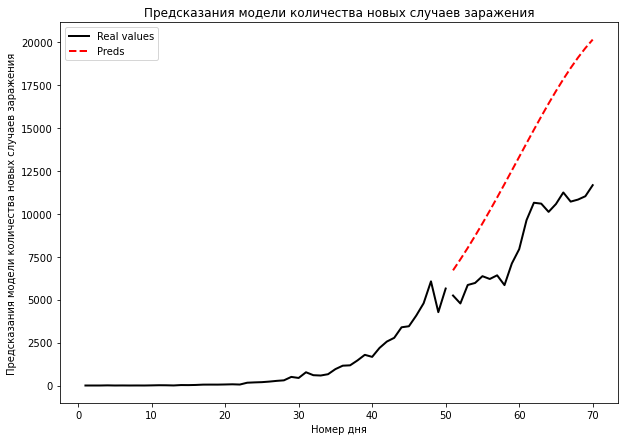

In [36]:
plot_pedictions(preds, "new_cases", "Предсказания модели количества новых случаев заражения")

In [37]:
noise_var = get_noise_var(np.log(train["new_cases"]), sigmoid_model.predict(new_x_train))

In [38]:
mu0, sigma0 = np.array([0, 0, 0]), 100 * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
x = np.hstack((np.ones((len(new_x_train), 1)), new_x_train))

In [39]:
mu, sigma = bayesian_update(mu0, sigma0, x, new_y_train, noise_var)

In [40]:
print("Параметры аостериорного распределения параметров модели:")
print("mu = ", mu)
print("sigma = ", sigma)

Параметры аостериорного распределения параметров модели:
mu =  [-0.67371137  0.27925589 -0.00182935]
sigma =  [[ 4.76401795e-02 -3.77285970e-03  6.22583826e-05]
 [-3.77285970e-03  3.89848643e-04 -7.18473670e-06]
 [ 6.22583826e-05 -7.18473670e-06  1.40884523e-07]]


c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [41]:
def square(weights, x):
    return weights[0] + weights[1] * x + weights[2] * x * x

In [42]:
weights = generate_weights(mu, sigma)

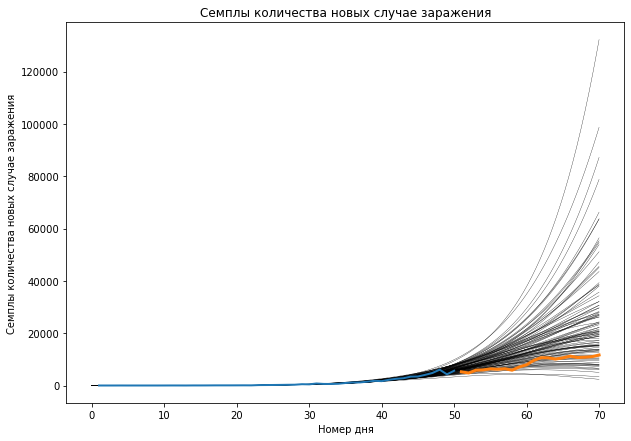

In [43]:
plot_samples(weights, "new_cases", "Семплы количества новых случае заражения", square)

In [44]:
def plot_predictions(preds_count, model=sigmoid_model):
    x = np.arange(1, preds_count, 1)
    x_for_preds = np.array([x, x ** 2]).T
    preds = np.exp(model.predict(x_for_preds))
    plt.figure(figsize=(10, 7))
    plt.xlabel("Номер дня")
    plt.ylabel("Количество новых случае заражения")
    plt.title("Предсказания количества новых случаев заражений")
    plt.plot(preds)
    plt.show()

<b> Построим графики предсказаний для количества новых случаев заражений. Убедимся, что к 160-му дню количество новых случаев заражений сходится в нулю, используем этот факт для предсказания количества общего числа случаев заражений </b>

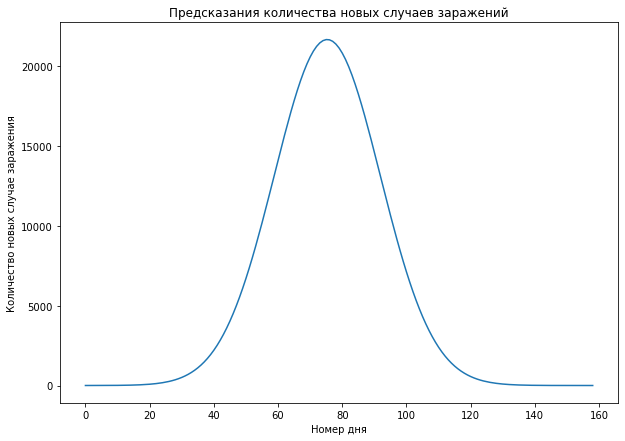

In [45]:
n_days = 160
plot_predictions(n_days)

In [46]:
x_for_n_days = np.arange(1, n_days, 1).reshape(-1, 1)
x = np.array([x_for_n_days, (x_for_n_days) ** 2]).T[0]
preds = get_predict_samples(x, 150, weights)

In [47]:
all_infected_cases_samples = np.array(preds).cumsum(axis=1)[:, -1]

In [48]:
print("Прогноз числа случаев коронавируса в пессимистичном сценарии - ", int(np.percentile(all_infected_cases_samples, 90)))
print("прогноз числа случаев коронавируса в оптимистичном сценарии - ", int(np.percentile(all_infected_cases_samples, 10)))

Прогноз числа случаев коронавируса в пессимистичном сценарии -  7892102
прогноз числа случаев коронавируса в оптимистичном сценарии -  312011


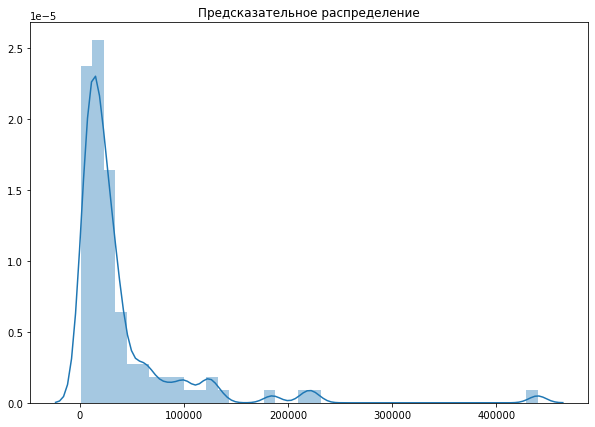

In [49]:
x = np.arange(start, start + 20, 1)
x_for_preds = np.array([x, x ** 2]).T
plot_predictive_dist(x_for_preds, 1000, weights)